# Задание 2

Перенесём в ноутбук файл sound(1).py

11


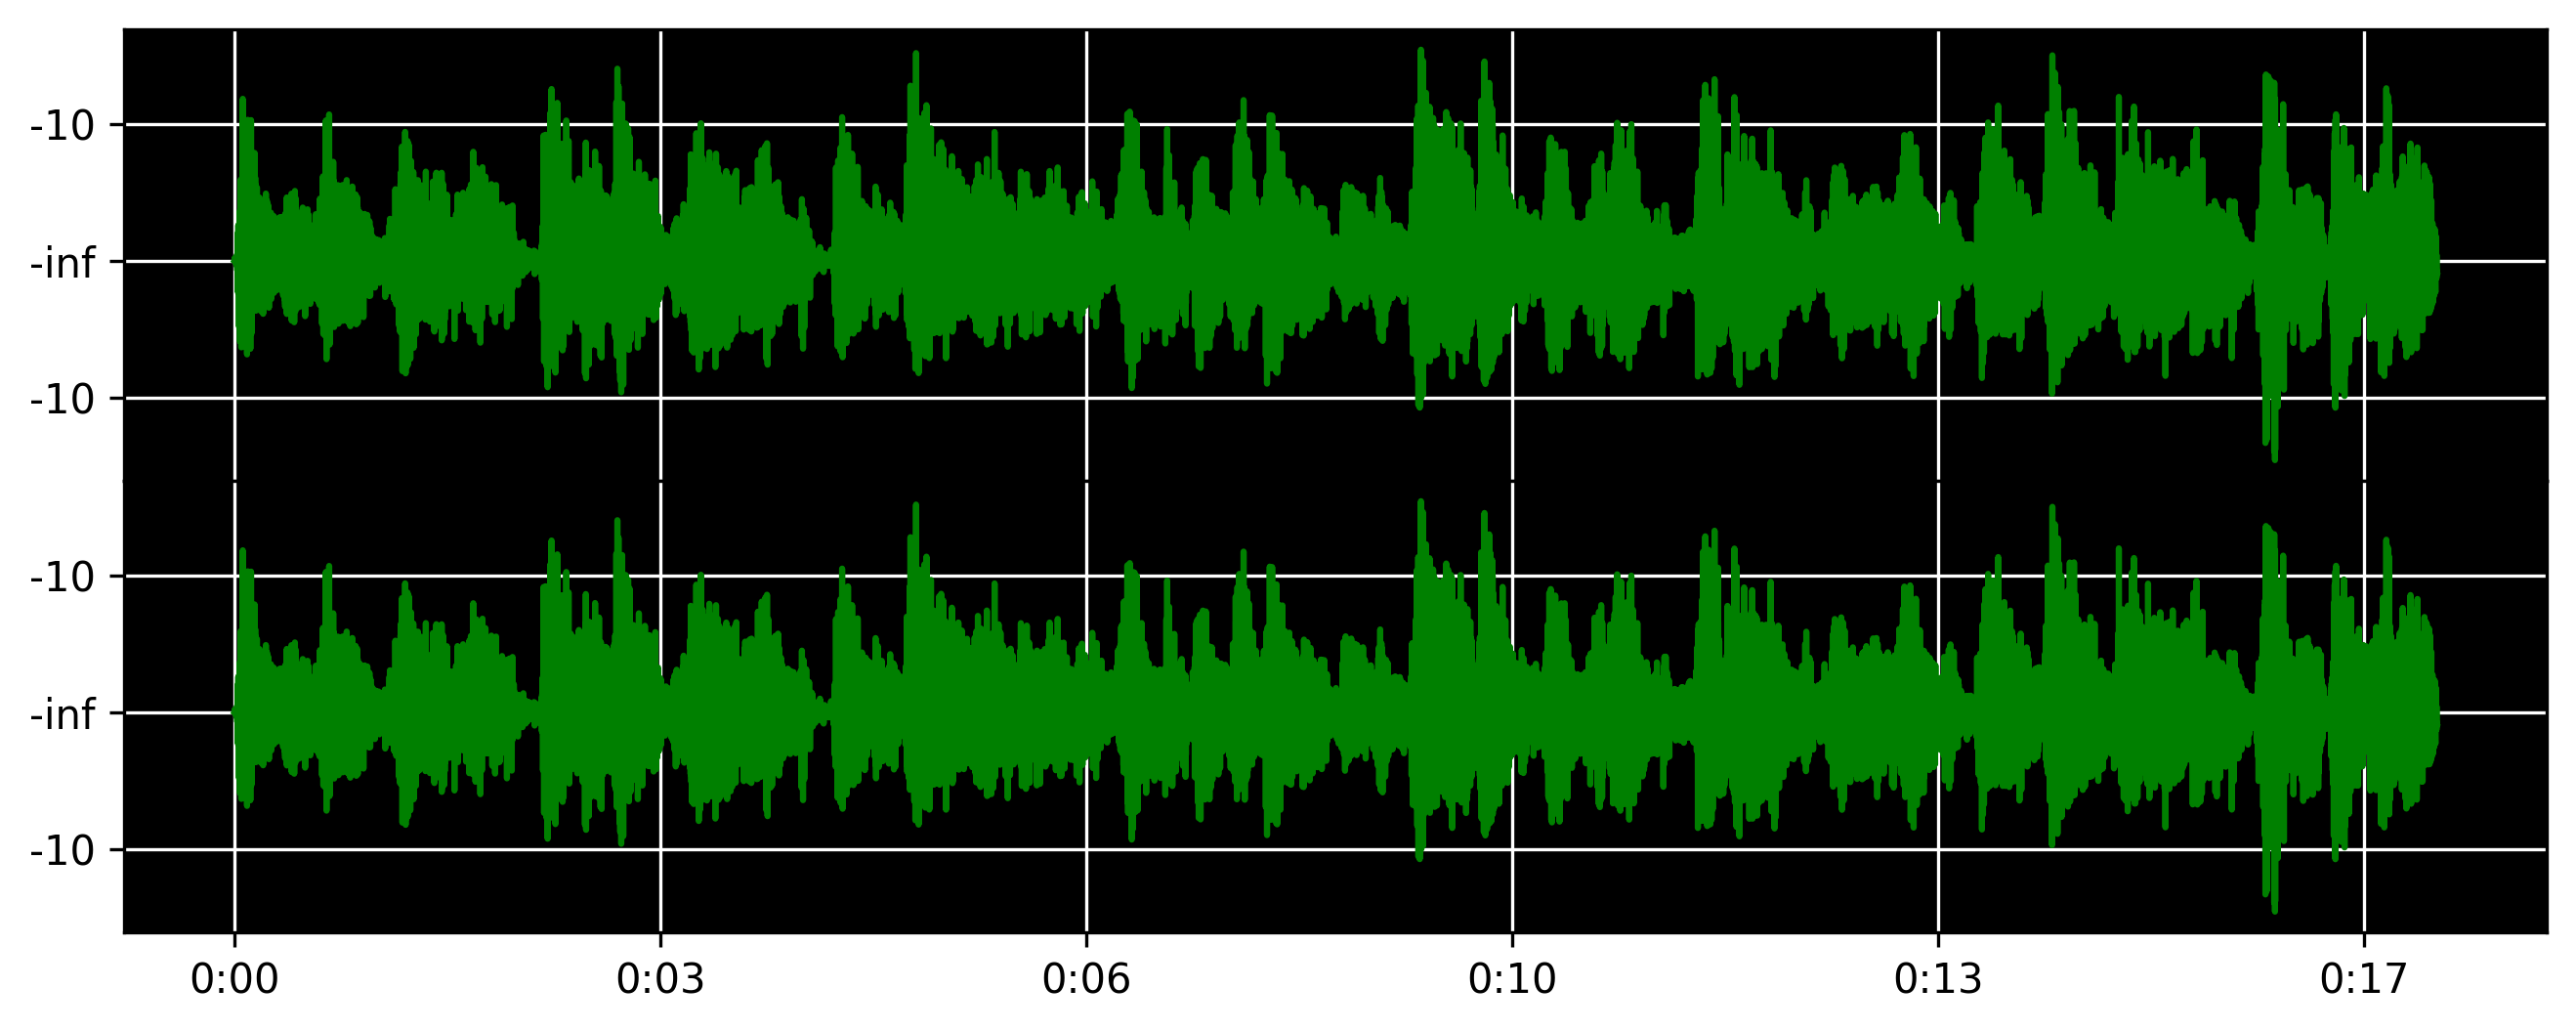

16000


In [74]:
import scipy.io.wavfile as wavfile
import wave
import pylab as pl
import numpy as np
import struct
import matplotlib.pyplot as plt
import matplotlib as mp
import math

def format_time(x, pos=None):
    global duration, nframes, k
    progress = int(x / float(nframes) * duration * k)
    mins, secs = divmod(progress, 60)
    hours, mins = divmod(mins, 60)
    out = "%d:%02d" % (mins, secs)
    if hours > 0:
        out = "%d:" % hours
    return out

def format_db(x, pos=None):
    if pos == 0:
        return ""
    global peak
    if x == 0:
        return "-inf"

    db = 20 * math.log10(abs(x) / float(peak))
    return int(db)

wav = wave.open("in10 (1).wav", mode="r")
(nchannels, sampwidth, framerate, nframes, comptype, compname) = wav.getparams()
content = wav.readframes(nframes)

types = {
    1: np.int8,
    2: np.int16,
    4: np.int32
}

samples = np.frombuffer(content, dtype=types[sampwidth])

duration = nframes / framerate 
w, h = 800, 300
DPI = 300
peak = 256 ** sampwidth / 2
k = int(nframes/w/32)
print(k)
plt.figure(1, figsize=(4*float(w)/DPI, 4*float(h)/DPI), dpi=DPI)
plt.subplots_adjust(wspace=0, hspace=0) 

for n in range(nchannels):
    channel = samples[n::nchannels]

    channel = channel[0::k]
    if nchannels == 1:
        channel = channel - peak
  
    axes = plt.subplot(2, 1, n+1, facecolor="k")
    axes.plot(channel, "g")
    axes.yaxis.set_major_formatter(mp.ticker.FuncFormatter(format_db))
    plt.grid(True, color="w")
    axes.xaxis.set_major_formatter(mp.ticker.NullFormatter())

axes.xaxis.set_major_formatter(mp.ticker.FuncFormatter(format_time))

plt.show()


data = samples[0::nchannels]


# Этот кусок разворачивает аудиозапись

dest = wave.open("out.wav", mode="wb")
dest.setparams(wav.getparams())

newdata = samples[::-1]

newframes = struct.pack('<' + str(len(newdata)) + 'h', *newdata)
# записываем содержимое в преобразованный файл.
dest.writeframes(newframes)
wav.close()
dest.close()
print(framerate)

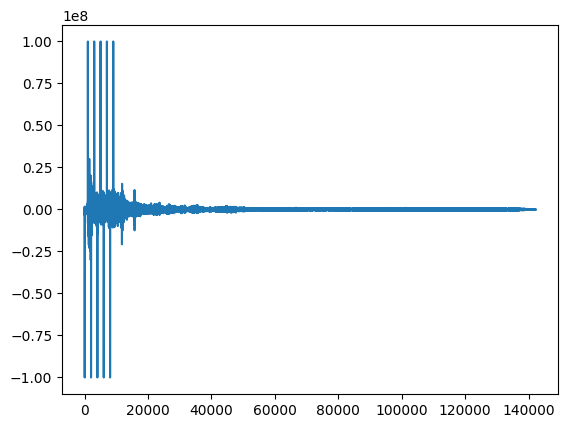

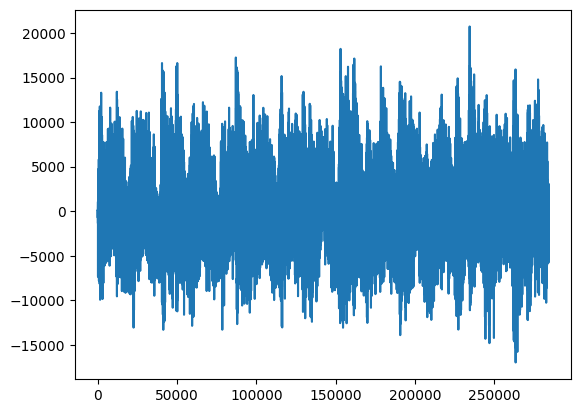

In [80]:
from scipy.fft import rfft, irfft

data_f = rfft(data)

for i in range(15,10000,1001):
    data_f[i] = (-1)**i*10*10**7

plt.plot(data_f)
plt.show()


data_n = irfft(data_f)

new_samples = samples.copy()
new_samples[::nchannels] = data_n
if nchannels!=1:
    new_samples[nchannels-1::nchannels] = data_n


plt.plot(data_n)

wav = wave.open("in10 (1).wav", mode="r")

dest = wave.open("out_low_noise.wav", mode="wb")
dest.setparams(wav.getparams())

newframes = struct.pack('<' + str(len(new_samples)) + 'h', *new_samples)
# записываем содержимое в преобразованный файл.
dest.writeframes(newframes)
wav.close()
dest.close()

16000


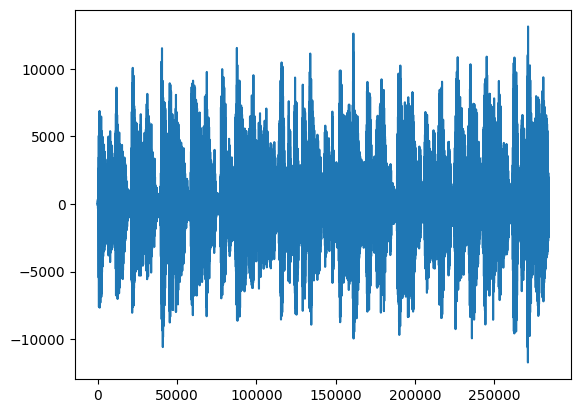

In [111]:
data_f = rfft(data)


for i in range(len(data_f)-130000,len(data_f)):
    data_f[i] = 0


data_n = irfft(data_f)

new_samples = samples.copy()
new_samples[::nchannels] = data_n
if nchannels!=1:
    new_samples[nchannels-1::nchannels] = data_n


plt.plot(data_n)

wav = wave.open("in10 (1).wav", mode="r")

dest = wave.open("out_no_high.wav", mode="wb")
dest.setparams(wav.getparams())

newframes = struct.pack('<' + str(len(new_samples)) + 'h', *new_samples)
# записываем содержимое в преобразованный файл.
dest.writeframes(newframes)
wav.close()
dest.close()
print(framerate)

16000


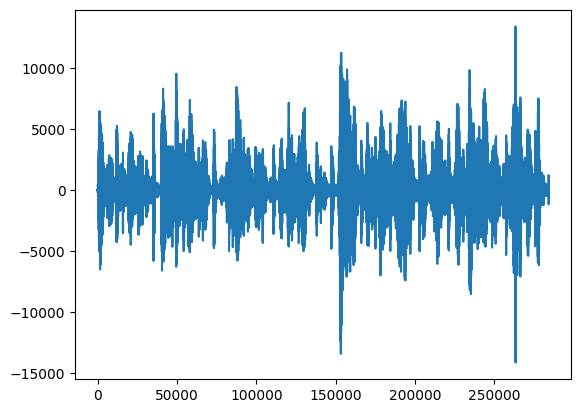

In [112]:
data_f = rfft(data)


for i in range(0,15000):
    data_f[i] = 0


data_n = irfft(data_f)

new_samples = samples.copy()
new_samples[::nchannels] = data_n
if nchannels!=1:
    new_samples[nchannels-1::nchannels] = data_n


plt.plot(data_n)

wav = wave.open("in10 (1).wav", mode="r")

dest = wave.open("out_no_low.wav", mode="wb")
dest.setparams(wav.getparams())

newframes = struct.pack('<' + str(len(new_samples)) + 'h', *new_samples)
# записываем содержимое в преобразованный файл.
dest.writeframes(newframes)
wav.close()
dest.close()
print(framerate)

16000


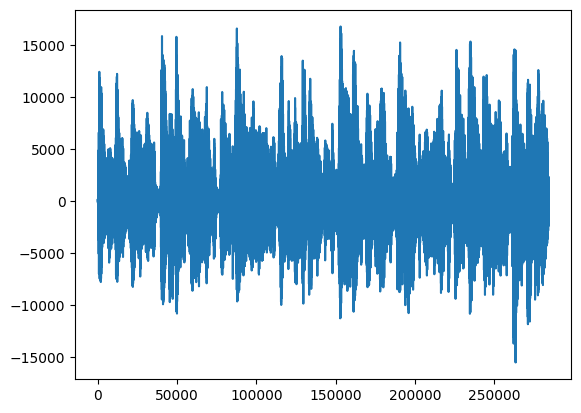

In [113]:
data_f = rfft(data)


data_n = irfft(data_f)

for i in range(0,len(data_n),2):
    data_n[i] = 0

new_samples = samples.copy()
new_samples[::nchannels] = data_n
if nchannels!=1:
    new_samples[nchannels-1::nchannels] = data_n


plt.plot(data_n)

wav = wave.open("in10 (1).wav", mode="r")

dest = wave.open("out_half.wav", mode="wb")
dest.setparams(wav.getparams())

newframes = struct.pack('<' + str(len(new_samples)) + 'h', *new_samples)
# записываем содержимое в преобразованный файл.
dest.writeframes(newframes)
wav.close()
dest.close()
print(framerate)

16000


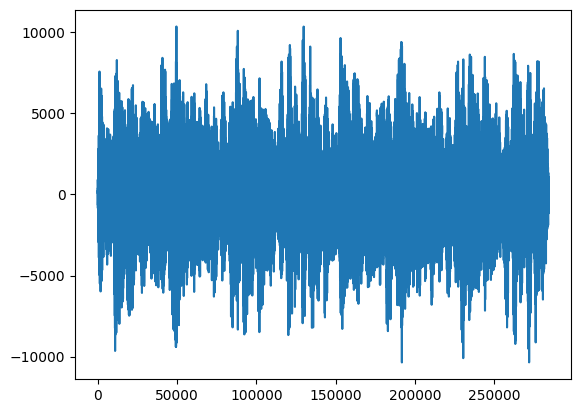

In [ ]:
data_f = rfft(data)


for i in range(0,len(data_f),2):
    data_f[i] = 0


data_n = irfft(data_f)

new_samples = samples.copy()
new_samples[::nchannels] = data_n
if nchannels!=1:
    new_samples[nchannels-1::nchannels] = data_n


plt.plot(data_n)

wav = wave.open("in10 (1).wav", mode="r")

dest = wave.open("out_double_sound.wav", mode="wb")
dest.setparams(wav.getparams())

newframes = struct.pack('<' + str(len(new_samples)) + 'h', *new_samples)
# записываем содержимое в преобразованный файл.
dest.writeframes(newframes)
wav.close()
dest.close()
print(framerate)